In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
model = tf.keras.models.load_model('model.h5')
model.summary();

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 64)      640       
_________________________________________________________________
activation_3 (Activation)    (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)           

conv2d_2 (3, 3, 1, 64)
64


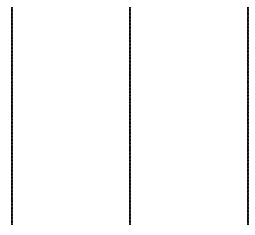

conv2d_3 (3, 3, 64, 64)
64


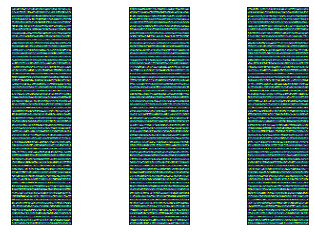

In [3]:
for layer in model.layers:
      if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        
        f_min, f_max = weights.min(), weights.max()
        
        filters = (weights - f_min) / (f_max - f_min)  
        print(layer.name, filters.shape)

        print(filters.shape[3])
        filter_cnt=1
        
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

(1, 198, 198, 64)
(1, 198, 198, 64)
(1, 99, 99, 64)
(1, 97, 97, 64)
(1, 97, 97, 64)
(1, 48, 48, 64)
(1, 147456)
(1, 64)
(1, 1)
(1, 1)


c:\users\kabil\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


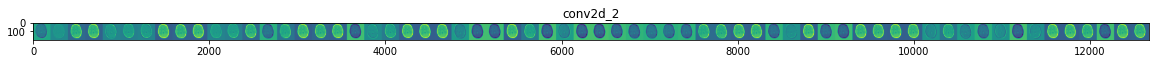

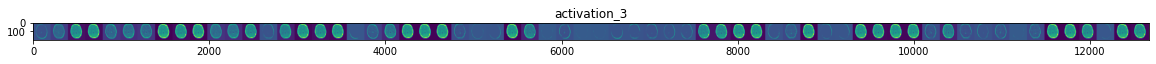

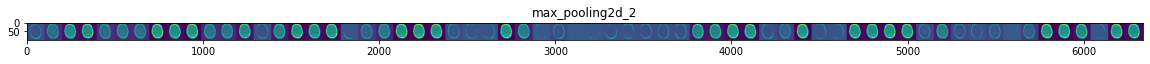

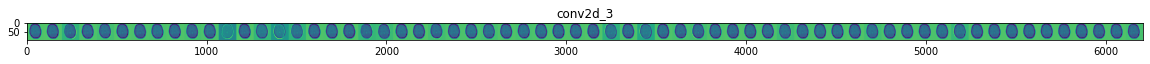

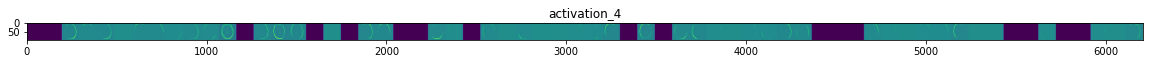

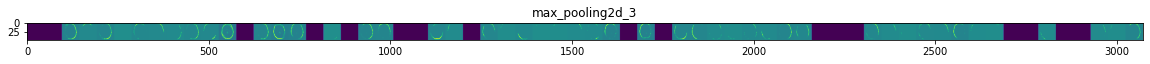

In [25]:
img_path = "test/normal-0.jpg"
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
img = load_img(img_path, target_size=(200, 200))
img= cv2.imread(img_path,0)
img = cv2.resize(img,(200,200))
x   = np.array(img).reshape(-1,200,200,1)
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1] 
    size       = feature_map.shape[ 1]  
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features 
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [20]:
for each in model.layers[1:]:
    print(each)

In [21]:
for each in model.layers:
    print(each)

In [ ]:
img_path = "test/normal-0.jpg"

successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(200, 200))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = np.array(img).reshape(-1,200,200,1)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )